11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 120s 245ms/step - loss: 0.1137 - val_loss: 0.1140
Epoch 2/10
469/469 [==============================] - 108s 231ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/10
469/469 [==============================] - 107s 229ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/10
469/469 [==============================] - 107s 228ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 5/10
469/469 [==============================] - 108s 231ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 6/10
469/469 [==============================] - 107s 228ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/10
469/469 [==============================] - 109s 232ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/10
469/469 [==============================] - 109s 232ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 9/10
469/469 [==============================] - 107s 229ms/step - loss: 0.1120 - val_loss: 0.1140

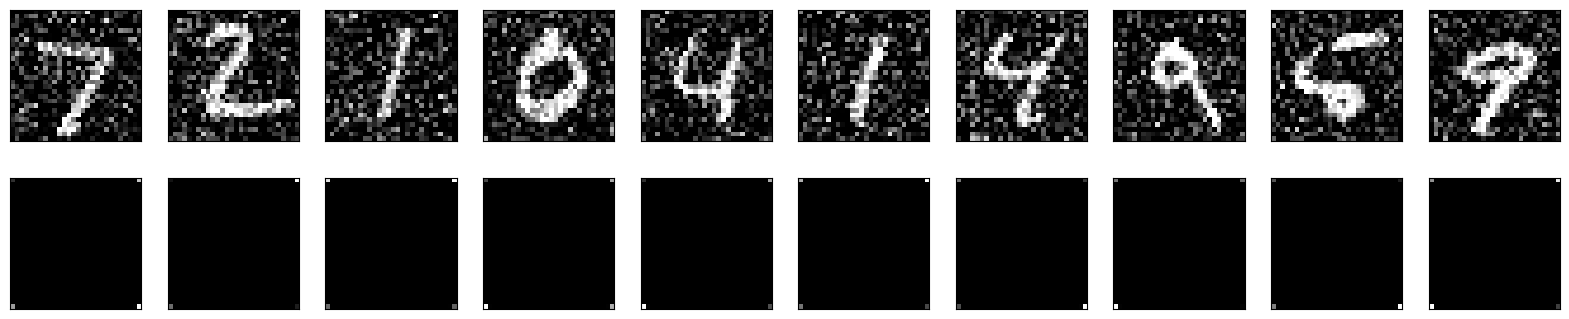

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from skimage.util import random_noise

# Step 1: Dataset Preparation
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Add random noise to images
x_train_noisy = random_noise(x_train, mode='gaussian', var=0.1)
x_test_noisy = random_noise(x_test, mode='gaussian', var=0.1)

# Reshape the images for convolutional autoencoder
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))

# Step 2: Model Architecture
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

# Step 3: Model Training
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')
history = autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

# Step 4: Model Evaluation
decoded_imgs = autoencoder.predict(x_test_noisy)

# Step 5: Visualize Reconstructed Images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()